center is a cycle
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


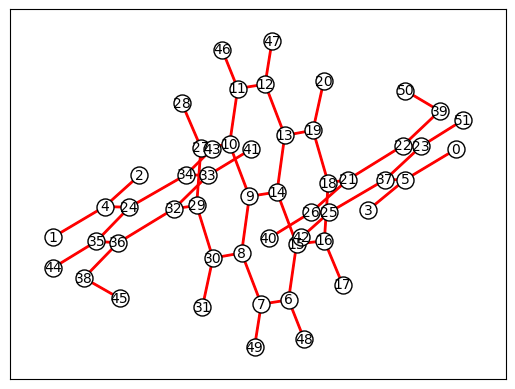

In [4]:
from frag_recognizer import *
import veloxchem as vlx

def plot2dedge(lG,coords,cycle,EDGE_length=False):
    #pos = coords
    #nodes = np.array([pos[v] for v in lG])
    #edges = np.array([(pos[u], pos[v]) for u, v in lG.edges()])
    #pos = None
    pos = coords[:,1:]
    # explicitly set positions
    #pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

    options = {
            "font_size": 10,
            "node_size": 150,
            "node_color": "white",
            "edgecolors": "black",
            "linewidths": 1,
            "width": 1,
        }
    nx.draw_networkx(lG,pos,**options)


    # edge weight labels
    if EDGE_length:
        edge_labels = nx.get_edge_attributes(lG, "weight")
        nx.draw_networkx_edge_labels(lG, pos, edge_labels)

    # Highlight the cycle in red
    if len(cycle)>0:
        nx.draw_networkx_edges(lG, pos, edgelist=cycle, edge_color="r", width=2)
    plt.show()

molecule = vlx.Molecule.read_xyz_file('NDI.xyz')

coords=molecule.get_coordinates_in_angstrom()
labels = molecule.get_labels()
# To remove center metals
lG,metals,mass_center_angstrom = create_lG(molecule)
lG.remove_nodes_from(metals)
center_class,center_nodes = distinguish_G_centers(lG)
lG = classify_nodes(lG,center_nodes)
print(center_nodes)
plot2dedge(lG,coords,lG.edges())

In [79]:
def find_center_nodes_pair(lG,center_nodes):
    if len(center_nodes)>6:
        centers=nx.center(lG)
        
    pairs=[]
    for i in range(len(centers)):
        for j in range(i,len(centers)):
            l=nx.shortest_path_length(lG,centers[i],centers[j])
            if l==1:
                pairs.append((centers[i],centers[j]))

    # loop each pair to find center pair
    for p in pairs:
        a=p[0]
        b=p[1]
        ds=[]
        for n in centers:
            if n not in p:
                d=nx.shortest_path_length(lG,a,n)
                ds.append(d)
        if len(set(ds)) < len(ds):
            center_pair = p
        
    return center_pair

In [80]:
center_pair

(9, 14)